# Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import statsmodels.formula.api as smf

# Carregando os dados, Ajustando as Variáveis

In [2]:
# exp = "iam"
# exp = "dpoc"
exp = "both"

if "both" in exp:
    df_read_iam = pd.read_csv('data/comparison_basic_metrics_pt_iam.csv')
    df_read_iam['experiment']="iam"
    df_read_dpoc = pd.read_csv('data/comparison_basic_metrics_pt_dpoc.csv')
    df_read_dpoc['experiment']="dpoc"

    df_basic = pd.concat([df_read_iam, df_read_dpoc])
    
    df_read_iam = pd.read_csv('data/comparison_projection_metrics_pt_iam.csv')
    df_read_iam['experiment']="iam"
    df_read_dpoc = pd.read_csv('data/comparison_projection_metrics_pt_dpoc.csv')
    df_read_dpoc['experiment']="dpoc"

    df_projection = pd.concat([df_read_iam, df_read_dpoc])
else:
    df_basic = pd.read_csv('data/comparison_basic_metrics_pt_' + exp + '.csv')
    df_basic['experiment'] = exp
    df_projection = pd.read_csv('data/comparison_projection_metrics_pt_' + exp + '.csv')
    df_projection['experiment'] = exp


# Renomeando por conveniencia na visualização
df_basic = df_basic.rename(columns={
    "average_clustering": "clustering",
    # "average_node_connectivity": "connectivity"
})
df_projection = df_projection.rename(columns={
    "average_clustering": "clustering",
    "average_shortest_path": "shortest_path",
    # "average_node_connectivity": "connectivity"
})

df_basic['numeric_label'] = 0
df_basic.loc[df_basic['label'] == 'top', 'numeric_label'] = 1

df_projection['numeric_label'] = 0
df_projection.loc[df_projection['label'] == 'top', 'numeric_label'] = 1

df_basic

,mean_degree,var_degree,skew_degree,kurt_degree,mean_strength,var_strength,skew_strength,kurt_strength,assortativity,density,center_of_mass,center_of_strength,model_name,map_dimensions,label,experiment,numeric_label
0,2.943723,1.983776,1.324921,2.664917,10.077922,122.306945,2.344615,6.297831,0.294540,0.012799,0.588745,-71.382743,gpt2-bio-pt,25,top,iam,1
1,3.094170,2.148750,0.865901,0.230226,8.717489,80.302711,2.038474,3.936132,0.368992,0.013938,0.520179,-74.921495,gpt2-bio-pt,25,botton,iam,0
2,2.888889,2.340996,1.394952,1.734867,19.897436,303.592838,1.776816,3.301449,0.239152,0.024904,0.085470,-81.759100,gpt2-bio-pt,10,top,iam,1
3,2.903846,2.243092,1.104214,0.427197,18.692308,271.244212,1.003048,0.214915,0.198050,0.028193,0.038462,-76.527183,gpt2-bio-pt,10,botton,iam,0
4,2.735632,2.243250,1.465140,1.746409,26.758621,418.045710,1.293808,0.905464,0.364164,0.031810,0.103448,-40.033520,gpt2-bio-pt,5,top,iam,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,2.907303,5.358484,2.921152,12.625650,3.505618,13.932458,3.467296,16.084629,0.124976,0.004089,0.342697,-53.591758,bert-base-portuguese-cased,25,botton,dpoc,0
32,4.368231,14.690002,2.916567,17.065596,7.624549,91.017946,2.976625,12.216575,-0.056272,0.015827,-0.108303,-132.675243,bert-base-portuguese-cased,10,top,dpoc,1
33,3.976812,10.947135,3.417794,20.760961,7.234783,90.488322,3.080931,12.283077,0.057651,0.011560,0.127536,-102.123818,bert-base-portuguese-cased,10,botton,dpoc,0
34,4.372881,12.389686,2.671145,11.912519,17.898305,573.698971,1.999725,3.361907,-0.088428,0.037375,-0.042373,-202.082815,bert-base-portuguese-cased,5,top,dpoc,1


array([[<Axes: title={'center': 'mean_degree'}>,
        <Axes: title={'center': 'var_degree'}>,
        <Axes: title={'center': 'skew_degree'}>,
        <Axes: title={'center': 'kurt_degree'}>],
       [<Axes: title={'center': 'mean_strength'}>,
        <Axes: title={'center': 'var_strength'}>,
        <Axes: title={'center': 'skew_strength'}>,
        <Axes: title={'center': 'kurt_strength'}>],
       [<Axes: title={'center': 'assortativity'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'center_of_mass'}>,
        <Axes: title={'center': 'center_of_strength'}>],
       [<Axes: title={'center': 'map_dimensions'}>,
        <Axes: title={'center': 'numeric_label'}>, <Axes: >, <Axes: >]],
      dtype=object)

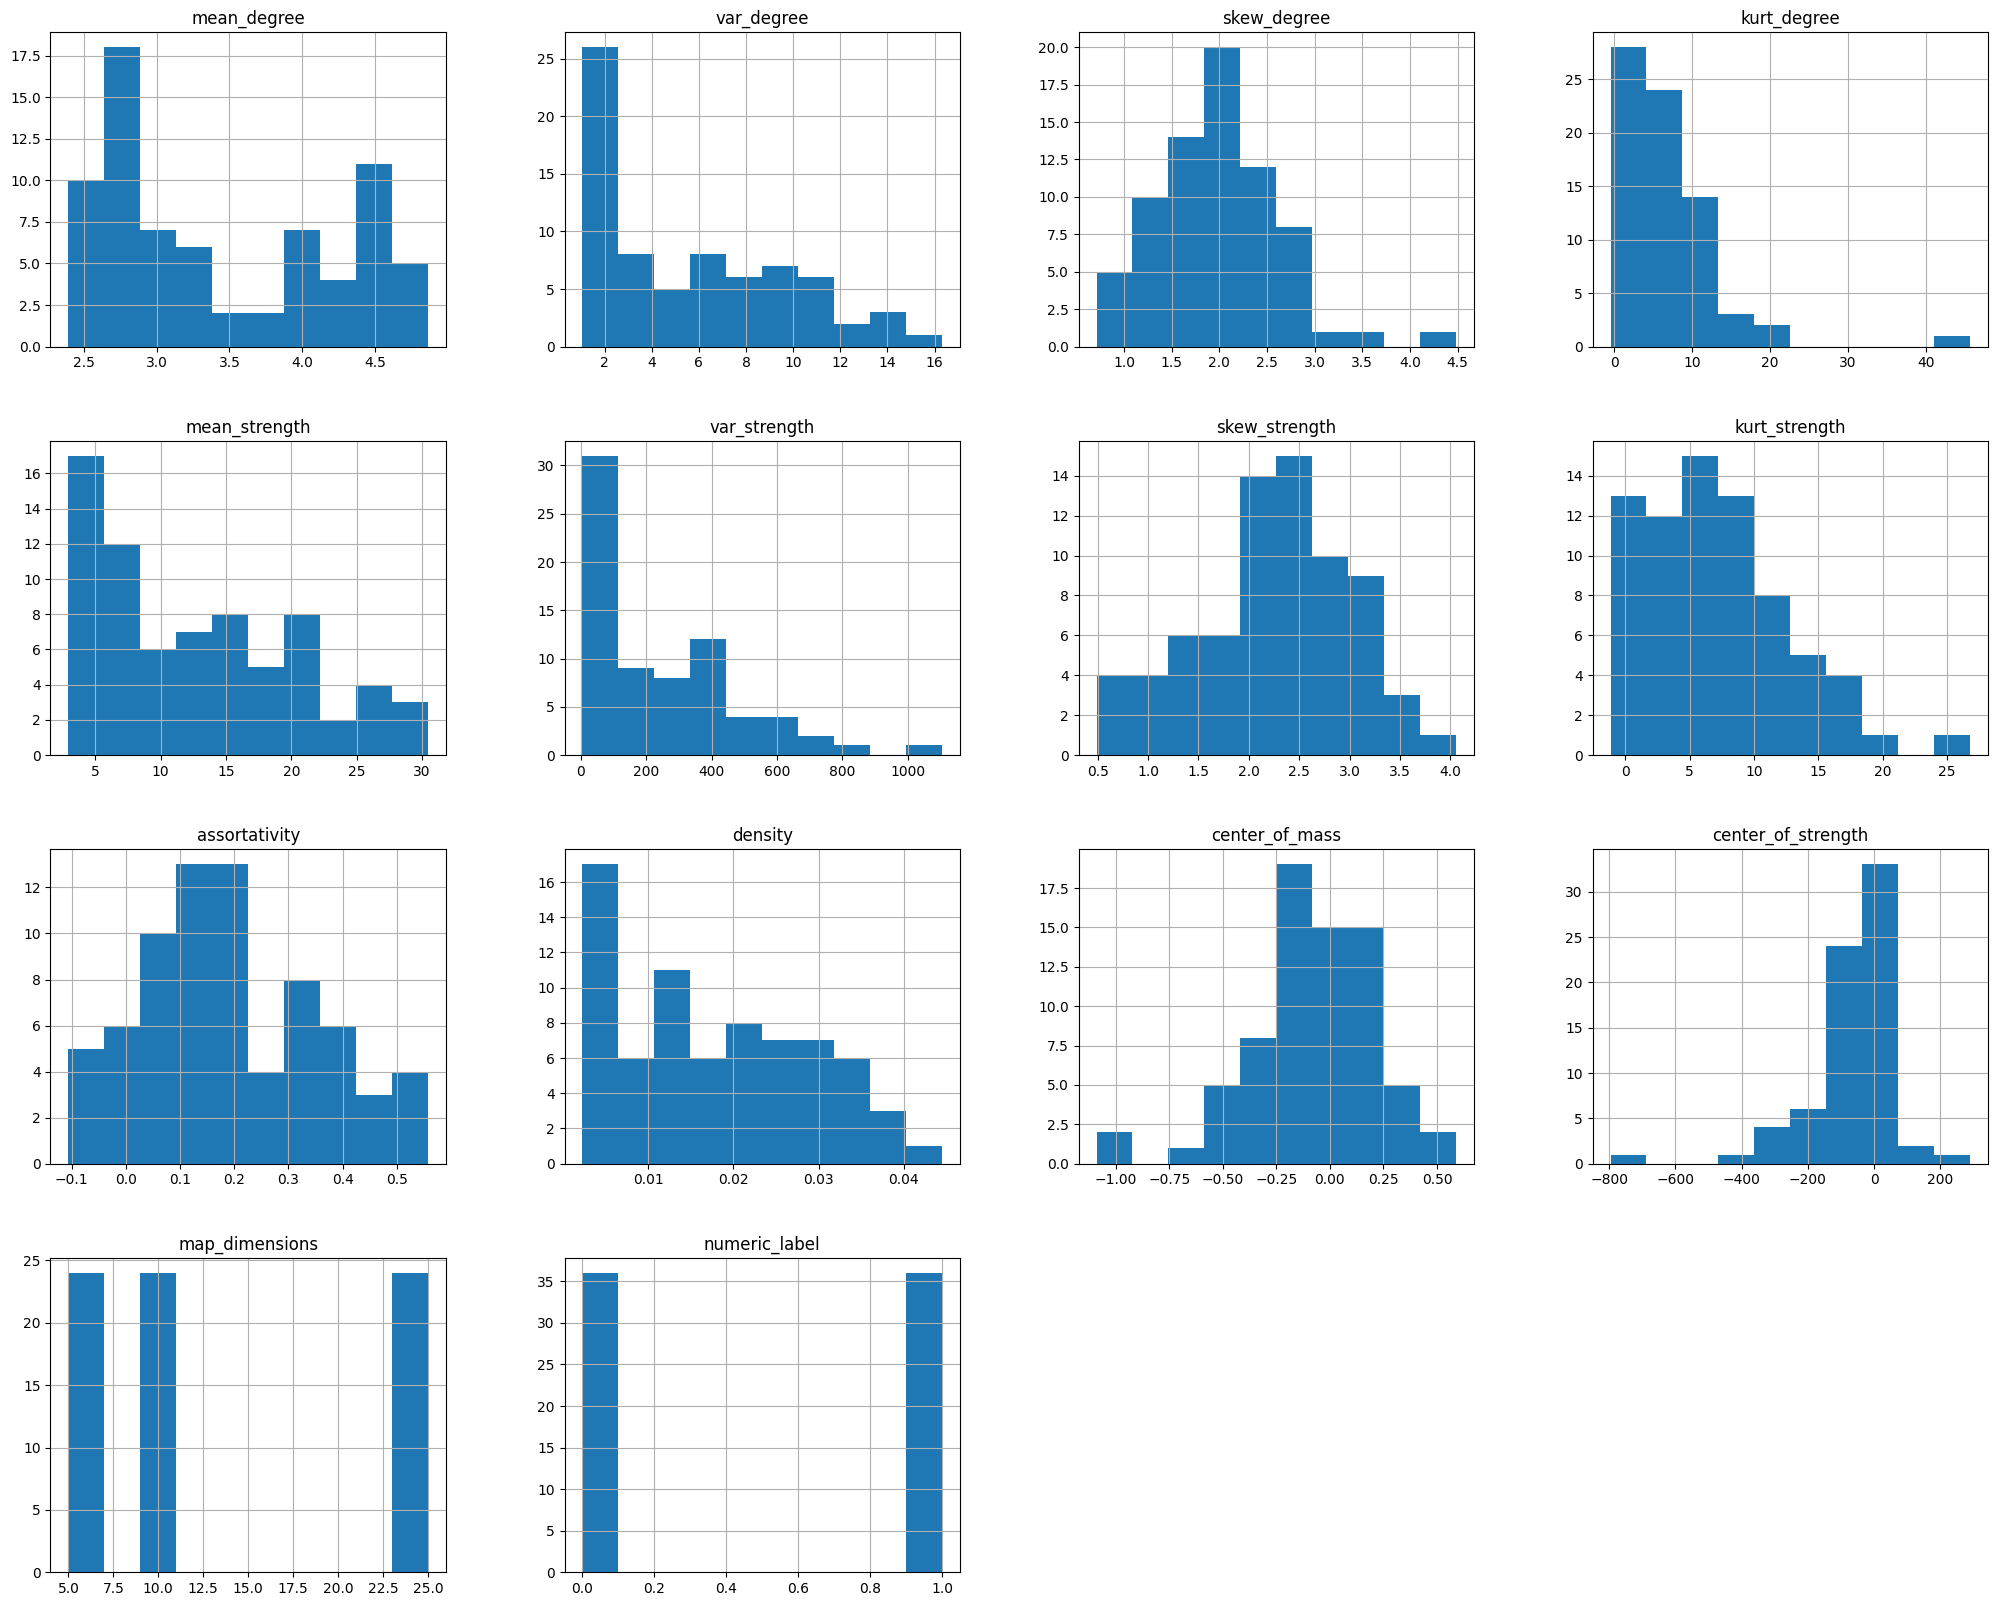

In [3]:
df_basic.hist(bins=10, figsize=(25, 20))

array([[<Axes: title={'center': 'mean_degree'}>,
        <Axes: title={'center': 'var_degree'}>,
        <Axes: title={'center': 'mean_strength'}>],
       [<Axes: title={'center': 'var_strength'}>,
        <Axes: title={'center': 'clustering'}>,
        <Axes: title={'center': 'assortativity'}>],
       [<Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'shortest_path'}>,
        <Axes: title={'center': 'map_dimensions'}>],
       [<Axes: title={'center': 'numeric_label'}>, <Axes: >, <Axes: >]],
      dtype=object)

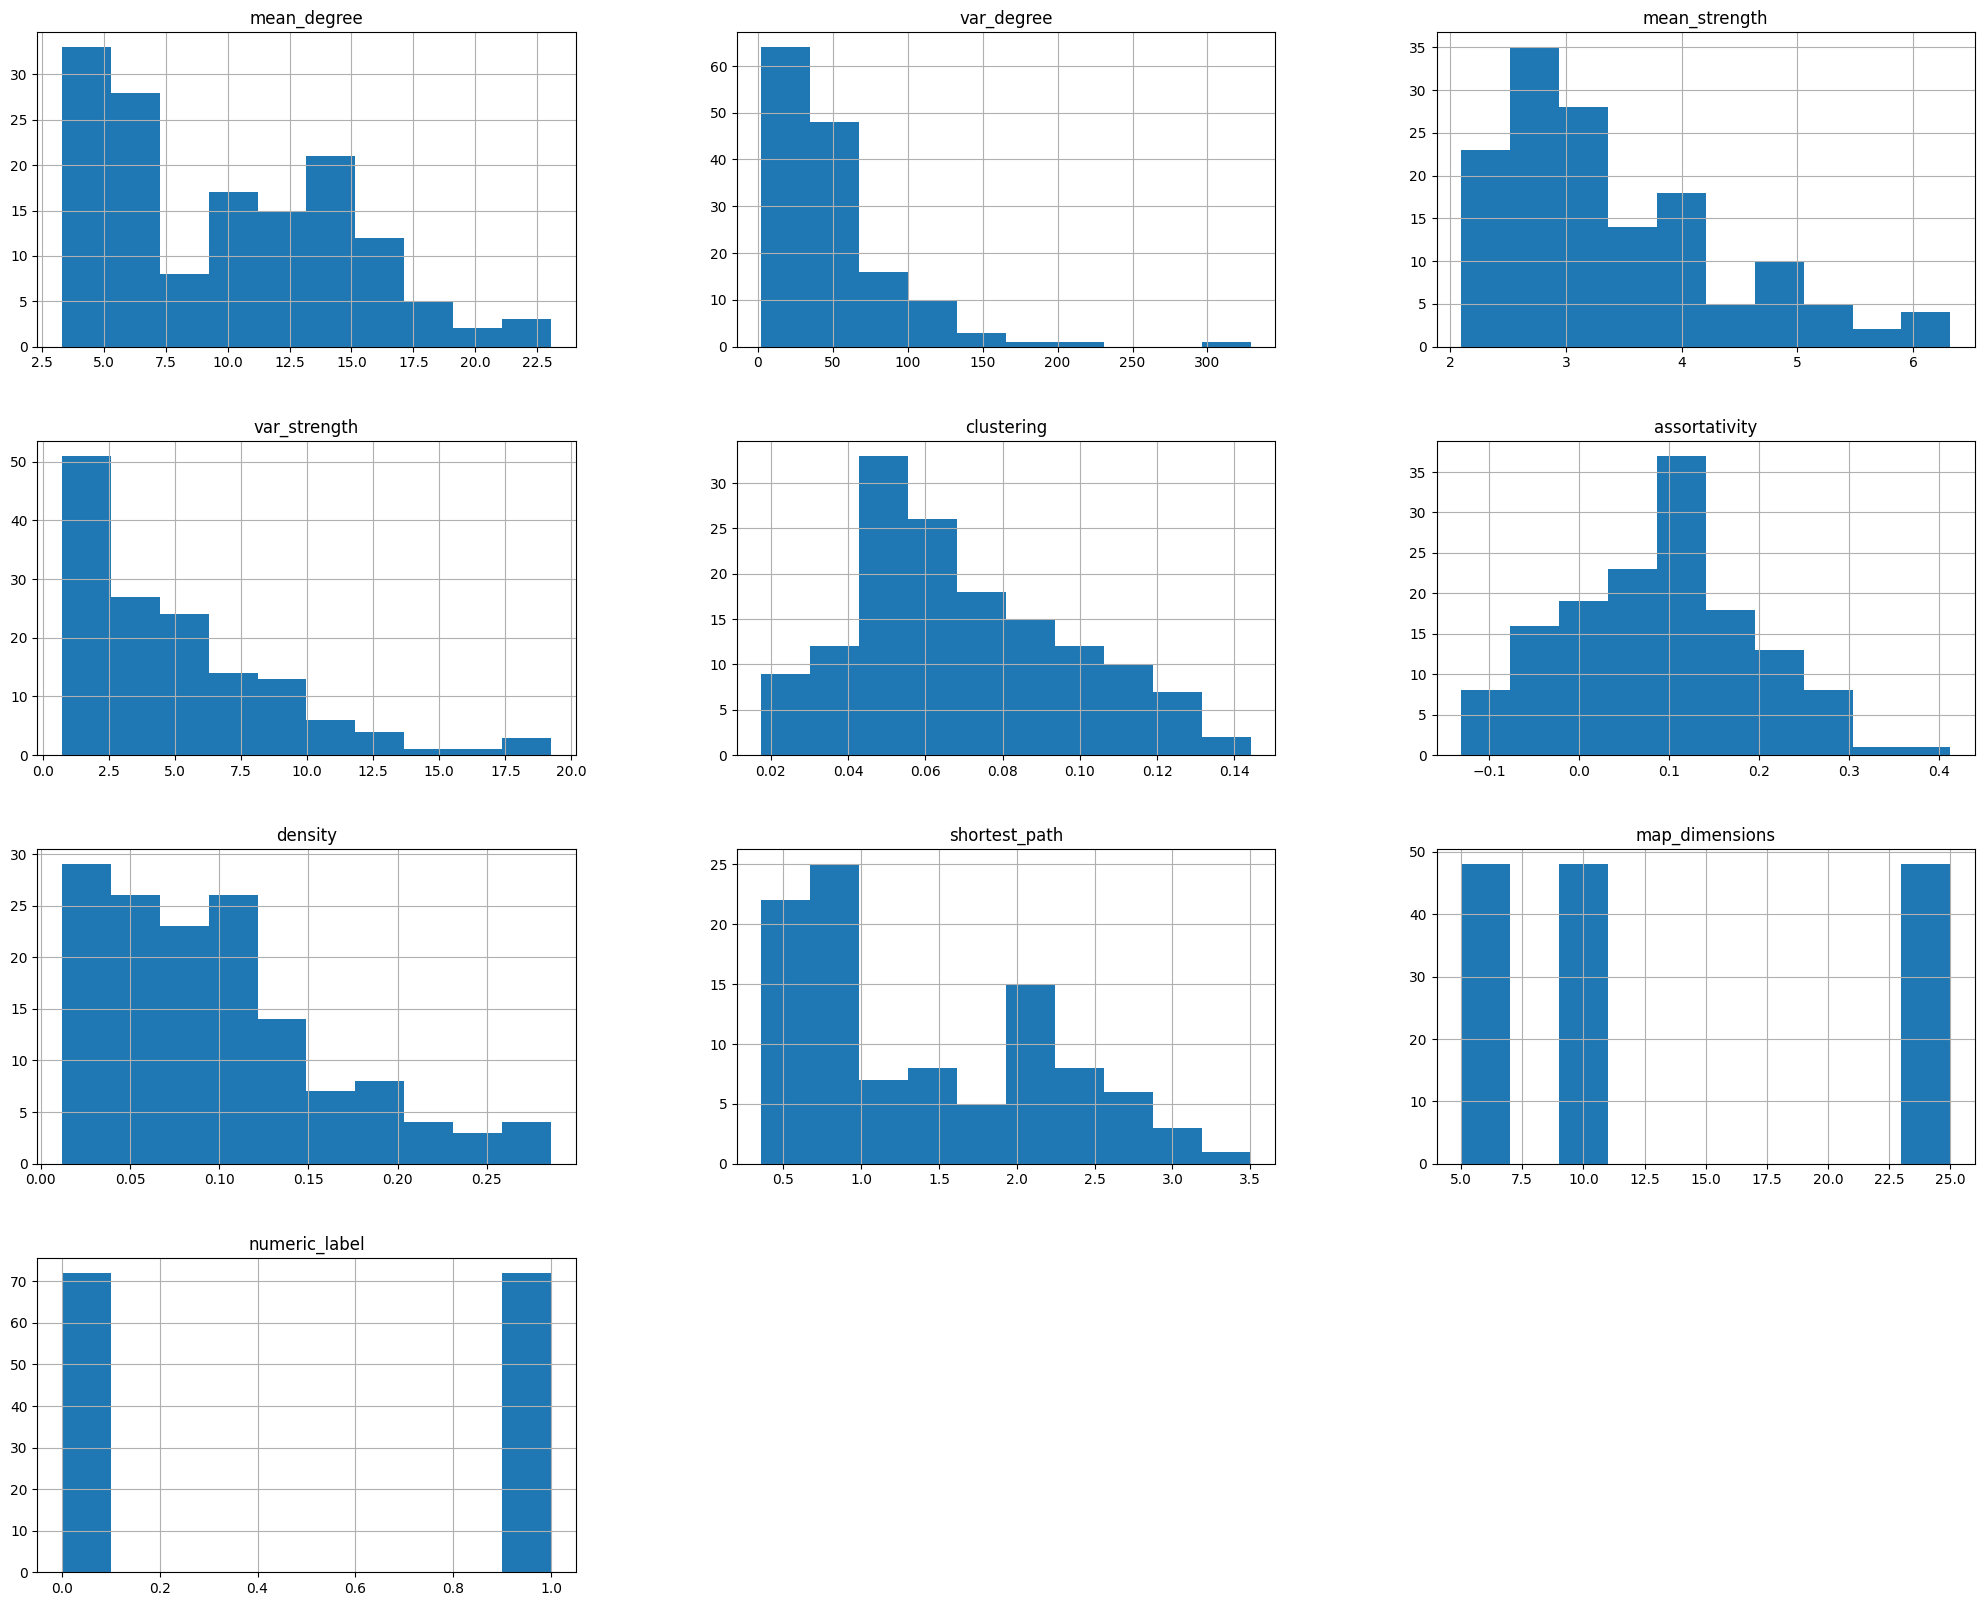

In [4]:
df_projection.hist(bins=10, figsize=(25, 20))

<Axes: >

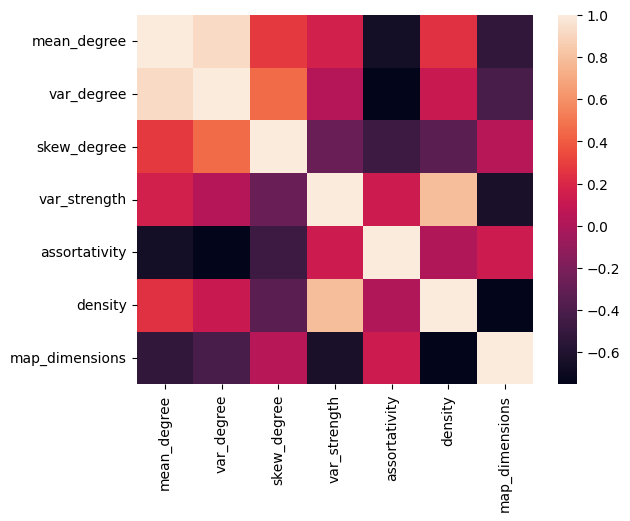

In [5]:
sns.heatmap(df_basic[[
    'mean_degree',
    'var_degree',
    'skew_degree',
    # # 'kurt_degree',
    # # 'mean_strength',
    'var_strength',
    # # 'skew_strength',
    # # 'kurt_strength',
    # 'clustering',
    # # 'connectivity',
    'assortativity',
    'density',
    # 'model_name',
    'map_dimensions',
    # 'label',
]].corr())

<Axes: >

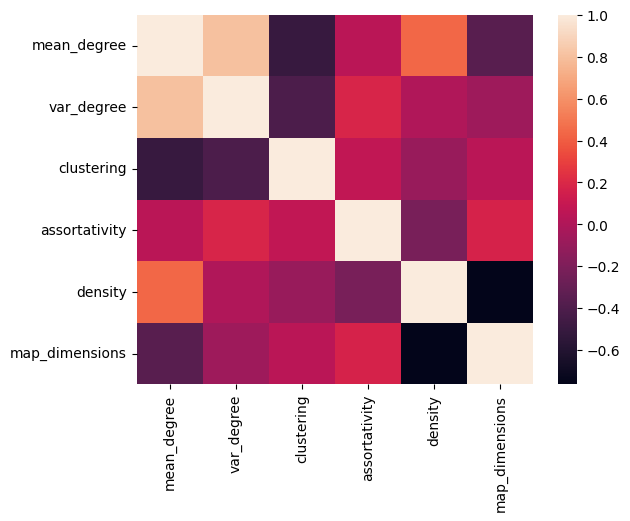

In [6]:
sns.heatmap(df_projection[[
    'mean_degree',
    'var_degree',
    'clustering',
    # 'connectivity',
    'assortativity',
    'density',
    # 'model_name',
    'map_dimensions',
    # 'label',
    # 'side'
]].corr())

# Normalizando valores

In [7]:
# Colunas para normalizar (qualquer uma que não seja das fixas)
coll_norm_basic_complete = ['model_name','map_dimensions','label','numeric_label', 'experiment'] # exceptions
coll_norm_proj_complete = ['model_name','map_dimensions','label','side','numeric_label', 'experiment'] # exceptions
# coll_norm_basic_complete = ['assortativity', 'density', 'model_name','map_dimensions','label','numeric_label', 'experiment'] # exceptions
# coll_norm_proj_complete = ['assortativity', 'density', 'clustering','model_name','map_dimensions','label','side','numeric_label', 'experiment'] # exceptions
coll_norm_basic = [c for c in df_basic.columns if c not in coll_norm_basic_complete]
coll_norm_proj = [c for c in df_projection.columns if c not in coll_norm_proj_complete]

# Normalização
df_norm_basic = (df_basic[coll_norm_basic] - df_basic[coll_norm_basic].min()) / (df_basic[coll_norm_basic].max() - df_basic[coll_norm_basic].min())
df_norm_proj = (df_projection[coll_norm_proj] - df_projection[coll_norm_proj].min()) / (df_projection[coll_norm_proj].max() - df_projection[coll_norm_proj].min())
# Normalização por experimento
# df_norm_basic = pd.concat([
#     (df_basic[df_basic["experiment"] == "iam"][coll_norm_basic] - df_basic[df_basic["experiment"] == "iam"][coll_norm_basic].min()) / (df_basic[df_basic["experiment"] == "iam"][coll_norm_basic].max() - df_basic[df_basic["experiment"] == "iam"][coll_norm_basic].min()),
#     (df_basic[df_basic["experiment"] == "dpoc"][coll_norm_basic] - df_basic[df_basic["experiment"] == "dpoc"][coll_norm_basic].min()) / (df_basic[df_basic["experiment"] == "dpoc"][coll_norm_basic].max() - df_basic[df_basic["experiment"] == "dpoc"][coll_norm_basic].min())
# ])
# df_norm_proj = pd.concat([
#     (df_projection[df_projection["experiment"] == "iam"][coll_norm_proj] - df_projection[df_projection["experiment"] == "iam"][coll_norm_proj].min()) / (df_projection[df_projection["experiment"] == "iam"][coll_norm_proj].max() - df_projection[df_projection["experiment"] == "iam"][coll_norm_proj].min()),
#     (df_projection[df_projection["experiment"] == "dpoc"][coll_norm_proj] - df_projection[df_projection["experiment"] == "dpoc"][coll_norm_proj].min()) / (df_projection[df_projection["experiment"] == "dpoc"][coll_norm_proj].max() - df_projection[df_projection["experiment"] == "dpoc"][coll_norm_proj].min())
# ]) 

# Estandartização
df_std_basic = (df_basic[coll_norm_basic] - df_basic[coll_norm_basic].mean()) / df_basic[coll_norm_basic].std() 
df_std_proj = (df_projection[coll_norm_proj] - df_projection[coll_norm_proj].mean()) / df_projection[coll_norm_proj].std()
# Estandartização por experimento
# df_std_basic = pd.concat([
#     (df_basic[df_basic["experiment"] == "iam"][coll_norm_basic] - df_basic[df_basic["experiment"] == "iam"][coll_norm_basic].mean()) / df_basic[df_basic["experiment"] == "iam"][coll_norm_basic].std(),
#     (df_basic[df_basic["experiment"] == "dpoc"][coll_norm_basic] - df_basic[df_basic["experiment"] == "dpoc"][coll_norm_basic].mean()) / df_basic[df_basic["experiment"] == "dpoc"][coll_norm_basic].std()
# ])
# df_std_proj = pd.concat([
#     (df_projection[df_projection["experiment"] == "iam"][coll_norm_proj] - df_projection[df_projection["experiment"] == "iam"][coll_norm_proj].mean()) / df_projection[df_projection["experiment"] == "iam"][coll_norm_proj].std(),
#     (df_projection[df_projection["experiment"] == "dpoc"][coll_norm_proj] - df_projection[df_projection["experiment"] == "dpoc"][coll_norm_proj].mean()) / df_projection[df_projection["experiment"] == "dpoc"][coll_norm_proj].std()
# ]) 

df_norm_basic[coll_norm_basic_complete] = df_basic[coll_norm_basic_complete]
df_norm_proj[coll_norm_proj_complete] = df_projection[coll_norm_proj_complete]
df_std_basic[coll_norm_basic_complete] = df_basic[coll_norm_basic_complete]
df_std_proj[coll_norm_proj_complete] = df_projection[coll_norm_proj_complete]

# Análise de Métricas Individuais

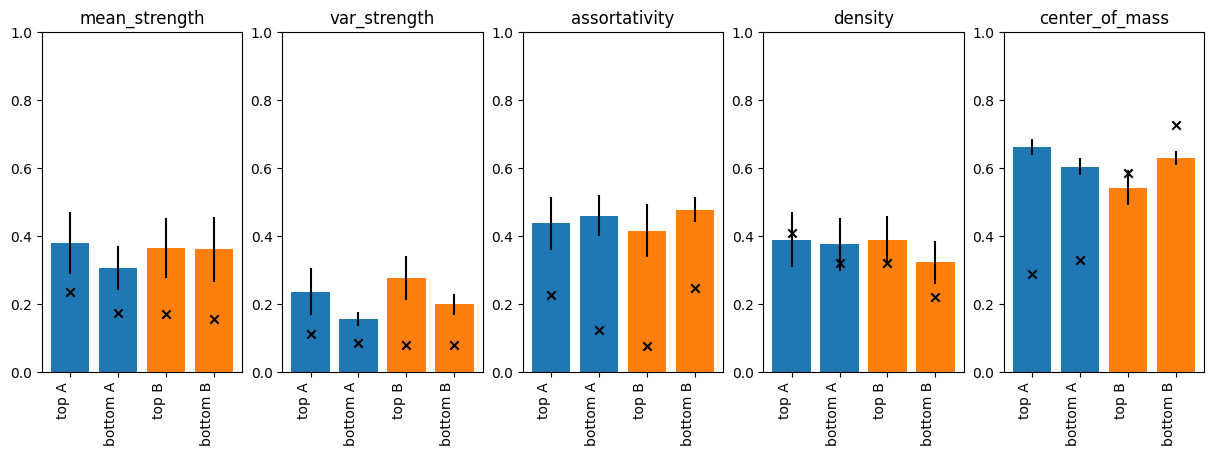

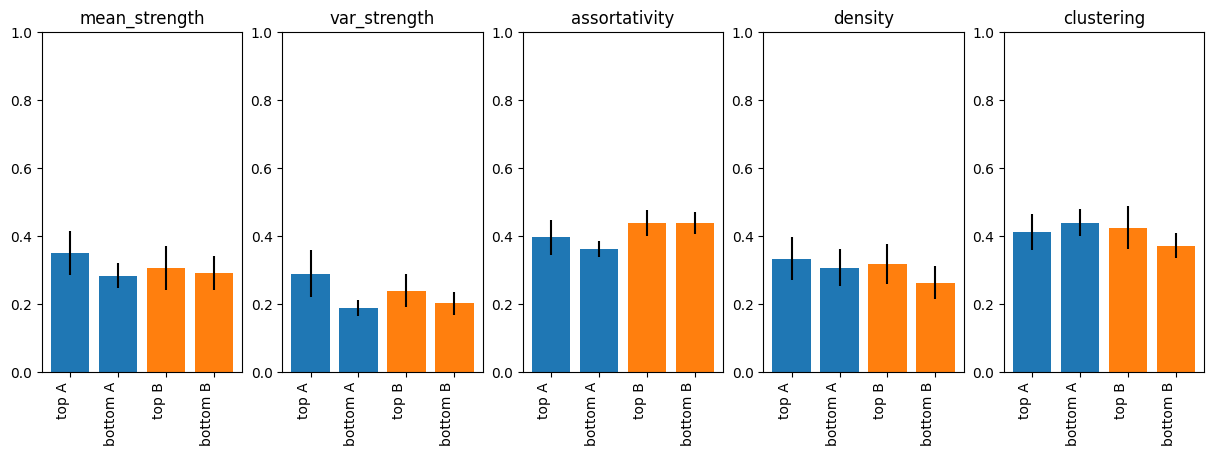

In [8]:
model_to_highlight = 'bert-base-portuguese-cased'
dimension_to_highlight = 10

dimensions = [
    5,
    10,
    25
]

models_list = [
    # "tiny-clinicalbert",
    # "distilbert-base-uncased",
    # "bert-base-uncased",
    # "Bio_ClinicalBERT",
    # "bert-large-uncased",
	"bert-base-portuguese-cased",
    "biobertpt-all",
	"bert-base-multilingual-cased",
	"bert-large-portuguese-cased",
    # "xlm-roberta-large", # faltou rodar pra dpoc
    # "xlm-roberta-xl",
	"gpt2-small-portuguese",
	"gpt2-bio-pt",
]
sides = [
    "even",
    "odd"
]
experiments = [
    "iam",
    "dpoc"
]
attributes_basic = [
    # 'mean_degree',
    # 'var_degree',
    # 'skew_degree',
    # 'kurt_degree',
    'mean_strength',
    'var_strength',
    # 'skew_strength',
    # 'kurt_strength',
    # # 'connectivity',
    'assortativity',
    'density',
    'center_of_mass',
    # 'center_of_strength'
]
attributes_projection = [
    # 'mean_degree',
    # 'var_degree',
    'mean_strength',
    'var_strength',
    # 'connectivity',
    'assortativity',
    'density',
    'clustering',
    # 'shortest_path'
]


fig1, axs1 = plt.subplots(1, len(attributes_basic))
fig2, axs2 = plt.subplots(1, len(attributes_projection))
# 
for index, att in enumerate(attributes_basic):
    if att in df_norm_basic.columns:
        top_basic = pd.Series(df_norm_basic.loc[
                        (df_norm_basic['map_dimensions'].isin(dimensions))
                        & (df_norm_basic['label'] == 'top')
                        & (df_norm_basic['model_name'].isin(models_list))
                        & (df_norm_basic['experiment'] == 'iam')
                        ][att].squeeze())
        botton_basic = pd.Series(df_norm_basic.loc[
                           (df_norm_basic['map_dimensions'].isin(dimensions))
                           & (df_norm_basic['label'] == 'botton')
                           & (df_norm_basic['model_name'].isin(models_list))
                            & (df_norm_basic['experiment'] == 'iam')
                           ][att].squeeze())
        axs1[index].bar(
            ['top A','bottom A'],
            [top_basic.mean(), botton_basic.mean()],
            yerr=[top_basic.var(), botton_basic.var()]
        )
        axs1[index].scatter(['top A','bottom A'], df_norm_basic.loc[ 
                                (df_norm_basic['model_name'] == model_to_highlight)
                                & (df_norm_basic['map_dimensions'] == dimension_to_highlight)
                                & (df_norm_basic['experiment'] == 'iam')
                            ][att], c='black', marker="x")

        ######################################################################3
        top_basic = pd.Series(df_norm_basic.loc[
                        (df_norm_basic['map_dimensions'].isin(dimensions))
                        & (df_norm_basic['label'] == 'top')
                        & (df_norm_basic['model_name'].isin(models_list))
                        & (df_norm_basic['experiment'] == 'dpoc')
                        ][att].squeeze())
        botton_basic = pd.Series(df_norm_basic.loc[
                           (df_norm_basic['map_dimensions'].isin(dimensions))
                           & (df_norm_basic['label'] == 'botton')
                           & (df_norm_basic['model_name'].isin(models_list))
                            & (df_norm_basic['experiment'] == 'dpoc')
                           ][att].squeeze())
        axs1[index].bar(
            ['top B','bottom B'],
            [top_basic.mean(), botton_basic.mean()],
            yerr=[top_basic.var(), botton_basic.var()]
        )
        axs1[index].scatter(['top B','bottom B'], df_norm_basic.loc[
                                (df_norm_basic['model_name'] == model_to_highlight)
                                & (df_norm_basic['map_dimensions'] == dimension_to_highlight)
                                & (df_norm_basic['experiment'] == 'dpoc')
                            ][att], c='black', marker="x")
        axs1[index].set_title(att)
        axs1[index].set_ylim([0,1])


for index, att in enumerate(attributes_projection):
    if att in df_norm_proj.columns:
        top_projection = pd.Series(df_norm_proj.loc[
                        (df_norm_proj['map_dimensions'].isin(dimensions))
                        & (df_norm_proj['label'] == 'top')
                        & (df_norm_proj['model_name'].isin(models_list))
                        & (df_norm_proj['experiment'] == 'iam')
                        ][att].squeeze())
        botton_projection = pd.Series(df_norm_proj.loc[
                           (df_norm_proj['map_dimensions'].isin(dimensions))
                           & (df_norm_proj['label'] == 'botton')
                           & (df_norm_proj['model_name'].isin(models_list))
                           & (df_norm_proj['experiment'] == 'iam')
                           ][att].squeeze())
        axs2[index].bar(
            ['top A','bottom A'],
            [top_projection.mean(), botton_projection.mean()],
            yerr=[top_projection.var(), botton_projection.var()]
        )
        # axs2[index].scatter(['top A','botton A'], df_norm_proj.loc[
        #                         (df_norm_proj['model_name'] == model_to_highlight)
        #                         & (df_norm_proj['map_dimensions'] == dimension_to_highlight)
        #                         & (df_norm_proj['side'] == 'even')
        #                         & (df_norm_proj['experiment'] == 'iam')
        #                     ][att], c='red')
        # axs2[index].scatter(['top A','botton A'], df_norm_proj.loc[
        #                         (df_norm_proj['model_name'] == model_to_highlight)
        #                         & (df_norm_proj['map_dimensions'] == dimension_to_highlight)
        #                         & (df_norm_proj['side'] == 'odd')
        #                         & (df_norm_proj['experiment'] == 'iam')
        #                     ][att], c='red')
        ######################################################
        top_projection = pd.Series(df_norm_proj.loc[
                        (df_norm_proj['map_dimensions'].isin(dimensions))
                        & (df_norm_proj['label'] == 'top')
                        & (df_norm_proj['model_name'].isin(models_list))
                        & (df_norm_proj['experiment'] == 'dpoc')
                        ][att].squeeze())
        botton_projection = pd.Series(df_norm_proj.loc[
                           (df_norm_proj['map_dimensions'].isin(dimensions))
                           & (df_norm_proj['label'] == 'botton')
                           & (df_norm_proj['model_name'].isin(models_list))
                           & (df_norm_proj['experiment'] == 'dpoc')
                           ][att].squeeze())
        axs2[index].bar(
            ['top B','bottom B'],
            [top_projection.mean(), botton_projection.mean()],
            yerr=[top_projection.var(), botton_projection.var()]
        )
        axs2[index].set_title(att)
        axs2[index].set_ylim([0,1])
        # axs2[index].scatter(['top B','botton B'], df_norm_proj.loc[
        #                         (df_norm_proj['model_name'] == model_to_highlight)
        #                         & (df_norm_proj['map_dimensions'] == dimension_to_highlight)
        #                         & (df_norm_proj['side'] == 'even')
        #                         & (df_norm_proj['experiment'] == 'dpoc')
        #                     ][att], c='red')
        # axs2[index].scatter(['top B','botton B'], df_norm_proj.loc[
        #                         (df_norm_proj['model_name'] == model_to_highlight)
        #                         & (df_norm_proj['map_dimensions'] == dimension_to_highlight)
        #                         & (df_norm_proj['side'] == 'odd')
        #                         & (df_norm_proj['experiment'] == 'dpoc')
        #                     ][att], c='red')


# fig1.suptitle('BASE - Comparando média e variância de variáveis entre modelos (norm)')
# plt.tight_layout()
fig1.set_figheight(5)
fig1.set_figwidth(15)
fig1.autofmt_xdate(rotation=90)
fig1.savefig('images/att_comparison_basic_norm_' + exp + '.png', bbox_inches='tight')
# fig1.show()
# fig2.suptitle('PROJEÇÃO - Comparando média e variância de variáveis entre modelos (norm)')
fig2.set_figheight(5)
fig2.set_figwidth(15)
fig2.autofmt_xdate(rotation=90)
fig2.savefig('images/att_comparison_projection_norm_' + exp + '.png', bbox_inches='tight')
# fig2.show()

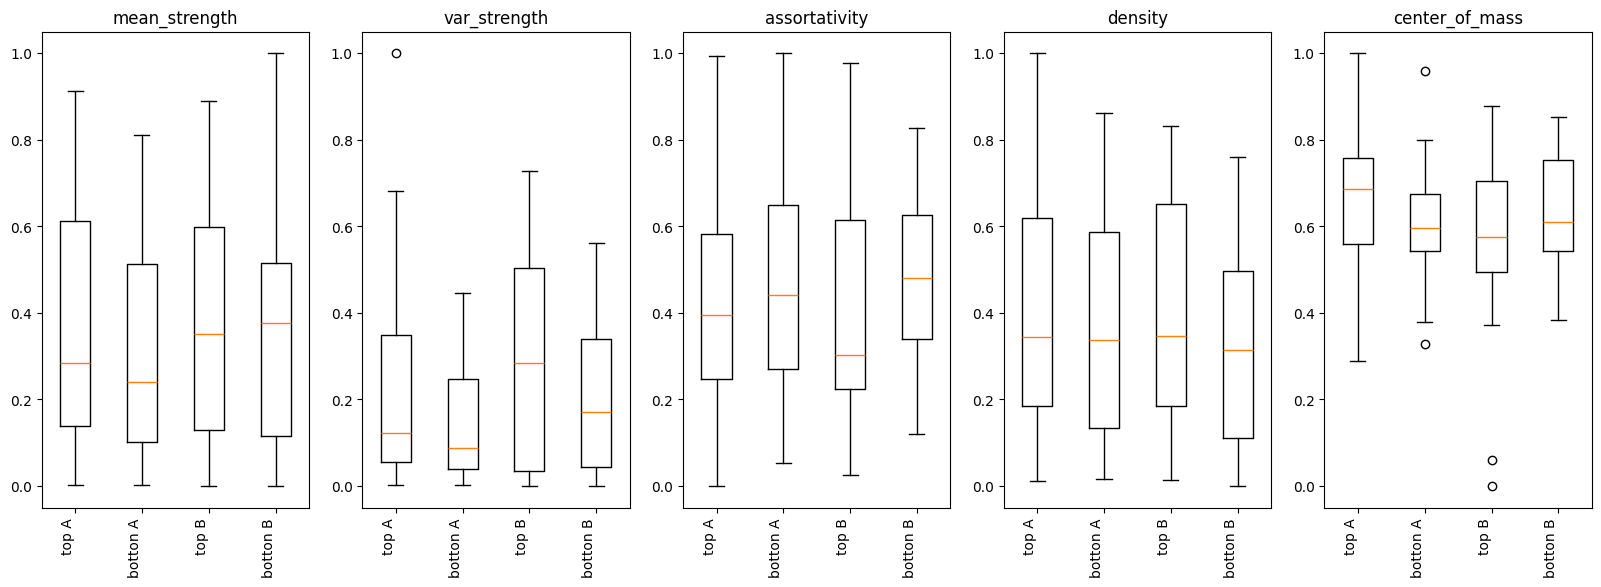

In [9]:
fig1, axs1 = plt.subplots(1, len(attributes_basic))


for index, att in enumerate(attributes_basic):
    if att in df_norm_basic.columns:
        a_top_basic = pd.Series(df_norm_basic.loc[
                        (df_norm_basic['map_dimensions'].isin(dimensions))
                        & (df_norm_basic['label'] == 'top')
                        & (df_norm_basic['model_name'].isin(models_list))
                        & (df_norm_basic['experiment'] == 'iam')
                        ][att].squeeze())
        a_botton_basic = pd.Series(df_norm_basic.loc[
                           (df_norm_basic['map_dimensions'].isin(dimensions))
                           & (df_norm_basic['label'] == 'botton')
                           & (df_norm_basic['model_name'].isin(models_list))
                            & (df_norm_basic['experiment'] == 'iam')
                           ][att].squeeze())
        ######################################################################3
        b_top_basic = pd.Series(df_norm_basic.loc[
                        (df_norm_basic['map_dimensions'].isin(dimensions))
                        & (df_norm_basic['label'] == 'top')
                        & (df_norm_basic['model_name'].isin(models_list))
                        & (df_norm_basic['experiment'] == 'dpoc')
                        ][att].squeeze())
        b_botton_basic = pd.Series(df_norm_basic.loc[
                           (df_norm_basic['map_dimensions'].isin(dimensions))
                           & (df_norm_basic['label'] == 'botton')
                           & (df_norm_basic['model_name'].isin(models_list))
                            & (df_norm_basic['experiment'] == 'dpoc')
                           ][att].squeeze())
        
        axs1[index].boxplot(
            # ['top B','botton B'],
            [a_top_basic, a_botton_basic, b_top_basic, b_botton_basic],
            # yerr=[top_basic.var(), botton_basic.var()]
            tick_labels=['top A','botton A', 'top B','botton B']
        )
        axs1[index].set_title(att)

        # axs1[index].scatter(['top A','botton A'], df_norm_basic.loc[ 
        #                         (df_norm_basic['model_name'] == model_to_highlight)
        #                         & (df_norm_basic['map_dimensions'] == dimension_to_highlight)
        #                         & (df_norm_basic['experiment'] == 'iam')
        #                     ][att], c='black', marker="x")

        # axs1[index].scatter(['top B','botton B'], df_norm_basic.loc[
        #                         (df_norm_basic['model_name'] == model_to_highlight)
        #                         & (df_norm_basic['map_dimensions'] == dimension_to_highlight)
        #                         & (df_norm_basic['experiment'] == 'dpoc')
        #                     ][att], c='black', marker="x")

fig1.set_figheight(7)
fig1.set_figwidth(20)
fig1.autofmt_xdate(rotation=90)
fig1.savefig('images/box_plot_' + exp + '.png', bbox_inches='tight')

# fig2, axs2 = plt.subplots(1, len(attributes_projection))

# for index, att in enumerate(attributes_projection):
#     if att in df_norm_proj.columns:
#         a_top_basic = pd.Series(df_norm_proj.loc[
#                         (df_norm_proj['map_dimensions'].isin(dimensions))
#                         & (df_norm_proj['label'] == 'top')
#                         & (df_norm_proj['model_name'].isin(models_list))
#                         & (df_norm_proj['experiment'] == 'iam')
#                         ][att].squeeze())
#         a_botton_basic = pd.Series(df_norm_proj.loc[
#                            (df_norm_proj['map_dimensions'].isin(dimensions))
#                            & (df_norm_proj['label'] == 'botton')
#                            & (df_norm_proj['model_name'].isin(models_list))
#                             & (df_norm_proj['experiment'] == 'iam')
#                            ][att].squeeze())
#         ######################################################################3
#         b_top_basic = pd.Series(df_norm_proj.loc[
#                         (df_norm_proj['map_dimensions'].isin(dimensions))
#                         & (df_norm_proj['label'] == 'top')
#                         & (df_norm_proj['model_name'].isin(models_list))
#                         & (df_norm_proj['experiment'] == 'dpoc')
#                         ][att].squeeze())
#         b_botton_basic = pd.Series(df_norm_proj.loc[
#                            (df_norm_proj['map_dimensions'].isin(dimensions))
#                            & (df_norm_proj['label'] == 'botton')
#                            & (df_norm_proj['model_name'].isin(models_list))
#                             & (df_norm_proj['experiment'] == 'dpoc')
#                            ][att].squeeze())
        
#         axs2[index].boxplot(
#             # ['top B','botton B'],
#             [a_top_basic, a_botton_basic, b_top_basic, b_botton_basic],
#             # yerr=[top_basic.var(), botton_basic.var()]
#             tick_labels=['top A','botton A', 'top B','botton B']
#         )
#         axs2[index].set_title(att)

#         # axs1[index].scatter(['top A','botton A'], df_norm_basic.loc[ 
#         #                         (df_norm_basic['model_name'] == model_to_highlight)
#         #                         & (df_norm_basic['map_dimensions'] == dimension_to_highlight)
#         #                         & (df_norm_basic['experiment'] == 'iam')
#         #                     ][att], c='black', marker="x")

#         # axs1[index].scatter(['top B','botton B'], df_norm_basic.loc[
#         #                         (df_norm_basic['model_name'] == model_to_highlight)
#         #                         & (df_norm_basic['map_dimensions'] == dimension_to_highlight)
#         #                         & (df_norm_basic['experiment'] == 'dpoc')
#         #                     ][att], c='black', marker="x")

# fig2.set_figheight(7)
# fig2.set_figwidth(20)
# fig2.autofmt_xdate(rotation=90)
# # fig1.savefig('images/box_plot_' + exp + '.png', bbox_inches='tight')

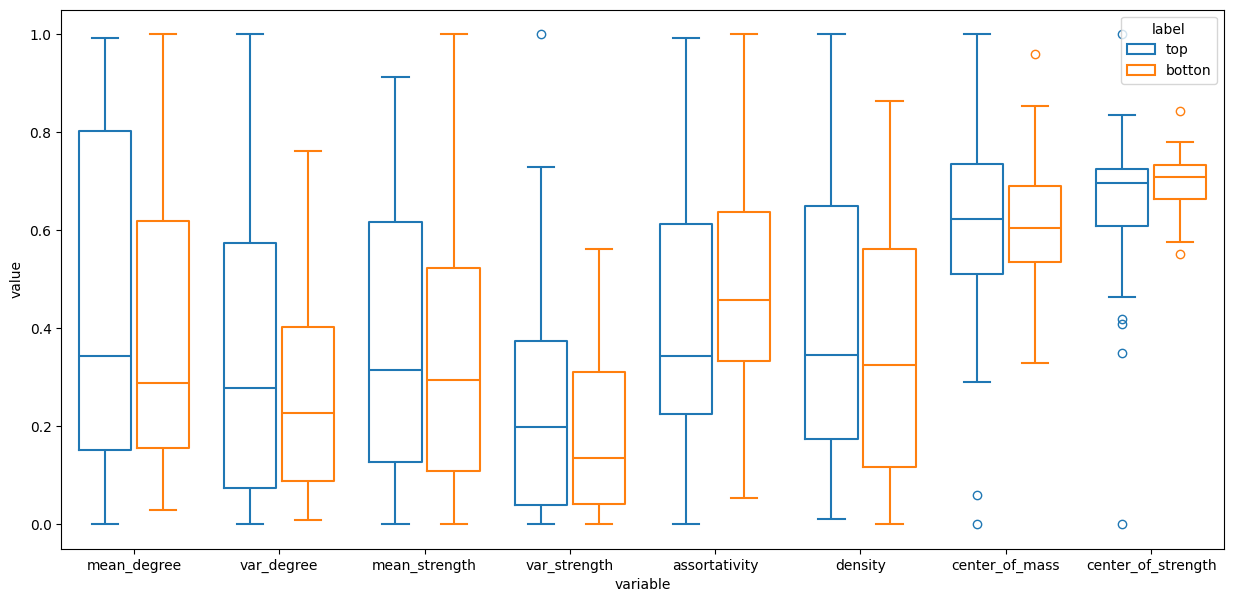

In [10]:


# ['mean_degree', 'var_degree', 'skew_degree', 'kurt_degree',
       # 'mean_strength', 'var_strength', 'skew_strength', 'kurt_strength',
       # 'assortativity', 'density', 'center_of_mass', 'center_of_strength',
       # 'model_name', 'map_dimensions', 'label', 'numeric_label', 'experiment']
fig = plt.figure(figsize=[15,7])

sns.boxplot(
    data = pd.melt(
        df_norm_basic,
        id_vars=['model_name', 'map_dimensions', 'label', 'numeric_label', 'experiment'],
        value_vars=['mean_degree', 'var_degree','mean_strength', 'var_strength','assortativity', 'density', 'center_of_mass', 'center_of_strength']
        # value_vars=['assortativity', 'density', 'center_of_mass']
    ),
    x="variable",
    y="value",
    hue='label',
    fill=False,
    gap=0.1
)#.set(title="Distribuição de centralidade de autovetor")
plt.tick_params(axis='y',which='both')


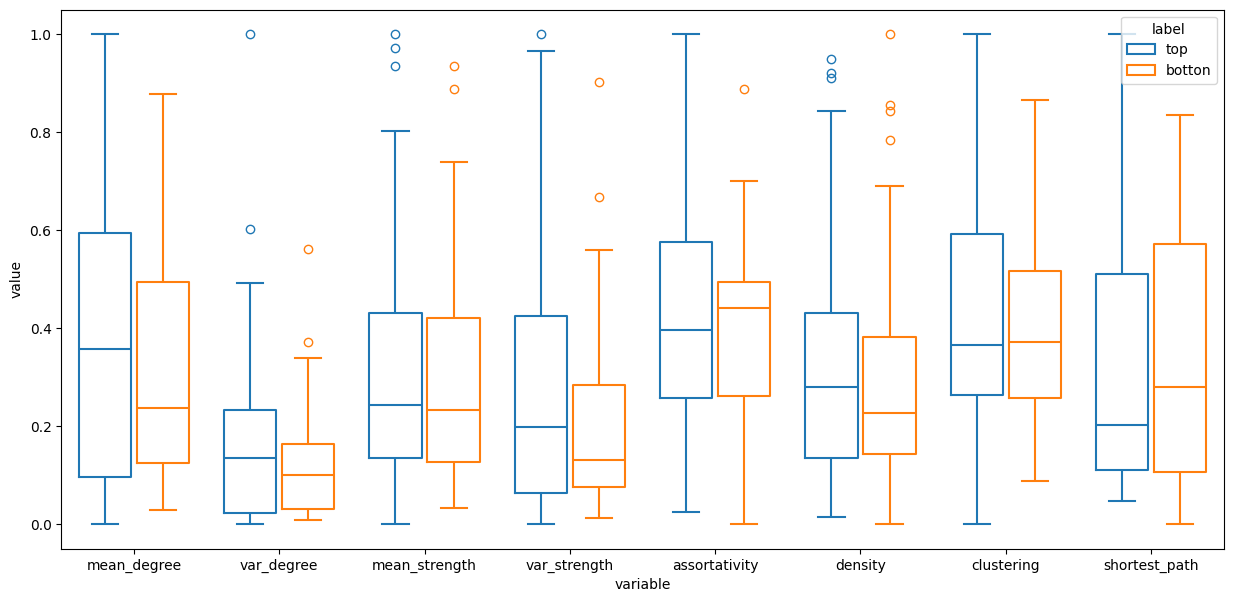

In [11]:


# ['mean_degree', 'var_degree', 'skew_degree', 'kurt_degree',
       # 'mean_strength', 'var_strength', 'skew_strength', 'kurt_strength',
       # 'assortativity', 'density', 'center_of_mass', 'center_of_strength',
       # 'model_name', 'map_dimensions', 'label', 'numeric_label', 'experiment']
fig = plt.figure(figsize=[15,7])

sns.boxplot(
    data = pd.melt(
        df_norm_proj,
        id_vars=['model_name', 'map_dimensions', 'label', 'numeric_label', 'experiment'],
        value_vars=['mean_degree', 'var_degree','mean_strength', 'var_strength','assortativity', 'density', 'clustering', 'shortest_path']
    ),
    x="variable",
    y="value",
    hue='label',
    fill=False,
    gap=0.1
)#.set(title="Distribuição de centralidade de autovetor")
plt.tick_params(axis='y',which='both')